In [ ]:
## Notes: 
- Data Bricks Certification


## Popular Big Data Formats

- Data format is a crucial aspect of working with big data
- The recurring topic is "There ain't such a thing as free lunch" (TANSTAAFL)
  - This principle applies to various aspects of working with big data, including choosing data formats for big data projects



## Key Considerations for Big Data Formats

- In light of the TANSTAAFL principle, consider the following challenges:
  - **Compression**: Different file formats offer varying levels of compressibility
  - **Splittability**: Evaluate how easily a file format can be split for distributed processing
  - **Column vs. Row Storage**: The importance of individual columns may vary
  - **Data Types and Schema Evolution**: Consider whether it's necessary to enforce data types

## File Format: an Intuition

- Selecting an appropriate storage format is crucial for:
  - Optimizing performance
  - Conserving storage space
  - Reducing complexity and costs
- Most people are familiar with row-based formats (e.g., MS Excel)

Example:

| Transaction Date | Nb Items | Total   |
|------------------|----------|---------|
| 01/01/2001       | 4        | 1852.14 |
| 01/01/2001       | 3        | 968.00  |
| 01/01/2001       | 5        | 129.51  |
| 01/02/2001       | 9        | 335.60  |

## File Format: an Intuition - Cont'd

- Current format may not be suitable for certain data types or operations
- E.g., sales information with a large volume of daily transactions
- A dictionary-like format might be more storage-efficient:

```python
{"01/01/2001": [(4, 1852.14), (3,  968.00), ...], "01/02/2001": [...], ... }
```


- This format would make day-based calculations more efficient


## File Format: an Intuition - Cont'd

- If the objective is to calculate total sales:
  - Table format: Sift through millions of lines
  - Dictionary format: Index into specific dates
- Another option is to use a column-based data format:

| **Totals**            | 1852.14    | 968.00     | 256.21     | ... |
|-----------------------|------------|------------|------------|-----|
| **Transaction Dates** | 01/01/2001 | 01/01/2001 | 01/02/2001 | ... |
| **Nb Items**          | 4          | 3          | 2          | ... |

## File Formats Decisions

Four key factors to consider when choosing file formats:

1. Row vs Column
   - What types of analytics will be performed?
2. Schema Management
   - Is it likely that data schemas will change over time?
3. Splittability
   - Is it possible to distribute data across multiple files or servers?
4. Compression
   - How well does the format compress?


## 1. Row- and Column-Based Formats

- This is a crucial factor to consider when choosing a format for big data

![Row vs Column Format](https://www.dropbox.com/s/an5fg7xl2uvnfb8/row_col_format.png?dl=1)


## Issue with In-Memory Data Layout

- What's the issue when data is not stored consecutively in RAM?
- Example: Storing rows but needing to extract a single column
- This makes data retrieval inefficient
- Buzzword Alert: It's a "Stride" problem!
  - A "stride" is the gap between data points we're interested in
  - In row-based data, to extract columns, we need to skip n-1 columns
  - This is called "strided access"


## Strided Access in Big Data Contexts

To understand strided access, let's use a simple analogy that everyone can relate to: a library.

### The Library Analogy

Imagine you're in a library with two different organizational systems:

1. **The Row-Based Library (Traditional System)**:
   - Books are arranged on shelves by genre, where each shelf contains books from multiple genres.

2. **The Column-Based Library (New System)**:
   - Books are arranged by genre, with each genre having its own separate shelf.
   - All books of the same genre are grouped together.

### Your Task

You need to find all science fiction books in the library to calculate the average number of pages.

#### In the Row-Based Library:
1. You start at one end of the library.
2. You walk along each shelf, checking every book.
3. When you find a sci-fi book, you note down its page count.
4. You continue this process, moving back and forth across the library.

This is similar to strided access in computing. You're constantly moving (or "striding") between relevant data (sci-fi books) while passing over irrelevant data (books from other genres).

#### In the Column-Based Library:
1. You go directly to the science fiction shelf.
2. You can quickly go through all sci-fi books in one place.
3. You don't need to look at or walk past books from other genres.

This is similar to contiguous access in computing. All the data you need is in one place, making the process much faster and more efficient.



## How This Relates to Big Data


1. **Row-Based Format** (like our first library):
   - Data about a single item (like a customer transaction) is stored together.
   - To analyze a specific aspect (like total sales), you need to look at every row and extract just that piece of information.
   - This is inefficient when you only need one type of information out of many.

2. **Column-Based Format** (like our second library):
   - All data of the same type (like all sales figures) are stored together.
   - To analyze total sales, you can access just the sales data directly, without going through other unrelated data.

### Why It Matters

1. **Speed**: In big data, you're often dealing with millions or billions of records. The time saved by not having to "stride" through irrelevant data can be significant.

2. **Efficiency**: Computers can process data more efficiently when it's stored together, similar to how it's easier for you to calculate average page count when all sci-fi books are on one shelf.

3. **Resource Use**: Reading less unnecessary data means using less memory and processing power, which is crucial when dealing with very large datasets.


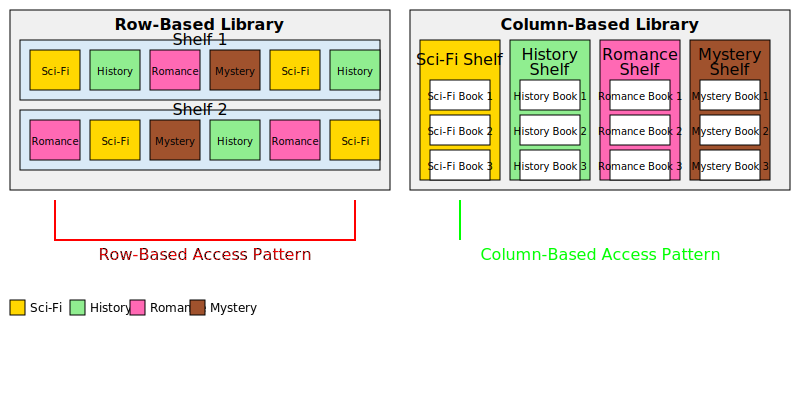

In [58]:
from IPython.display import SVG, display
svg_content = """
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 800 400">
  <!-- Row-Based Library -->
  <rect x="10" y="10" width="380" height="180" fill="#f0f0f0" stroke="#000" />
  <text x="200" y="30" text-anchor="middle" font-weight="bold">Row-Based Library</text>
  
  <rect x="20" y="40" width="360" height="60" fill="#d9eaf7" stroke="#000" />
  <text x="200" y="45" text-anchor="middle">Shelf 1</text>
  <rect x="30" y="50" width="50" height="40" fill="#ffd700" stroke="#000" />
  <text x="55" y="75" text-anchor="middle" font-size="10">Sci-Fi</text>
  <rect x="90" y="50" width="50" height="40" fill="#90ee90" stroke="#000" />
  <text x="115" y="75" text-anchor="middle" font-size="10">History</text>
  <rect x="150" y="50" width="50" height="40" fill="#ff69b4" stroke="#000" />
  <text x="175" y="75" text-anchor="middle" font-size="10">Romance</text>
  <rect x="210" y="50" width="50" height="40" fill="#a0522d" stroke="#000" />
  <text x="235" y="75" text-anchor="middle" font-size="10">Mystery</text>
  <rect x="270" y="50" width="50" height="40" fill="#ffd700" stroke="#000" />
  <text x="295" y="75" text-anchor="middle" font-size="10">Sci-Fi</text>
  <rect x="330" y="50" width="50" height="40" fill="#90ee90" stroke="#000" />
  <text x="355" y="75" text-anchor="middle" font-size="10">History</text>

  <rect x="20" y="110" width="360" height="60" fill="#d9eaf7" stroke="#000" />
  <text x="200" y="115" text-anchor="middle">Shelf 2</text>
  <rect x="30" y="120" width="50" height="40" fill="#ff69b4" stroke="#000" />
  <text x="55" y="145" text-anchor="middle" font-size="10">Romance</text>
  <rect x="90" y="120" width="50" height="40" fill="#ffd700" stroke="#000" />
  <text x="115" y="145" text-anchor="middle" font-size="10">Sci-Fi</text>
  <rect x="150" y="120" width="50" height="40" fill="#a0522d" stroke="#000" />
  <text x="175" y="145" text-anchor="middle" font-size="10">Mystery</text>
  <rect x="210" y="120" width="50" height="40" fill="#90ee90" stroke="#000" />
  <text x="235" y="145" text-anchor="middle" font-size="10">History</text>
  <rect x="270" y="120" width="50" height="40" fill="#ff69b4" stroke="#000" />
  <text x="295" y="145" text-anchor="middle" font-size="10">Romance</text>
  <rect x="330" y="120" width="50" height="40" fill="#ffd700" stroke="#000" />
  <text x="355" y="145" text-anchor="middle" font-size="10">Sci-Fi</text>

  <!-- Column-Based Library -->
  <rect x="410" y="10" width="380" height="180" fill="#f0f0f0" stroke="#000" />
  <text x="600" y="30" text-anchor="middle" font-weight="bold">Column-Based Library</text>

  <rect x="420" y="40" width="80" height="140" fill="#ffd700" stroke="#000" />
  <text x="460" y="65" text-anchor="middle">Sci-Fi Shelf</text>
  <rect x="430" y="80" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="460" y="100" text-anchor="middle" font-size="10">Sci-Fi Book 1</text>
  <rect x="430" y="115" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="460" y="135" text-anchor="middle" font-size="10">Sci-Fi Book 2</text>
  <rect x="430" y="150" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="460" y="170" text-anchor="middle" font-size="10">Sci-Fi Book 3</text>

  <rect x="510" y="40" width="80" height="140" fill="#90ee90" stroke="#000" />
  <text x="550" y="60" text-anchor="middle">History</text>
  <text x="550" y="75" text-anchor="middle">Shelf</text>
  <rect x="520" y="80" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="550" y="100" text-anchor="middle" font-size="10">History Book 1</text>
  <rect x="520" y="115" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="550" y="135" text-anchor="middle" font-size="10">History Book 2</text>
  <rect x="520" y="150" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="550" y="170" text-anchor="middle" font-size="10">History Book 3</text>

  <rect x="600" y="40" width="80" height="140" fill="#ff69b4" stroke="#000" />
  <text x="640" y="60" text-anchor="middle">Romance</text>
  <text x="640" y="75" text-anchor="middle">Shelf</text>

<rect x="610" y="80" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="640" y="100" text-anchor="middle" font-size="10">Romance Book 1</text>
  <rect x="610" y="115" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="640" y="135" text-anchor="middle" font-size="10">Romance Book 2</text>
  <rect x="610" y="150" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="640" y="170" text-anchor="middle" font-size="10">Romance Book 3</text>

  <rect x="690" y="40" width="80" height="140" fill="#a0522d" stroke="#000" />
  <text x="730" y="60" text-anchor="middle">Mystery</text>
  <text x="730" y="75" text-anchor="middle">Shelf</text>
  <rect x="700" y="80" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="730" y="100" text-anchor="middle" font-size="10">Mystery Book 1</text>
  <rect x="700" y="115" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="730" y="135" text-anchor="middle" font-size="10">Mystery Book 2</text>
  <rect x="700" y="150" width="60" height="30" fill="#fff" stroke="#000" />
  <text x="730" y="170" text-anchor="middle" font-size="10">Mystery Book 3</text>

  <!-- Arrows for access pattern -->
  <path d="M 55 200 L 55 240 L 355 240 L 355 200" fill="none" stroke="#ff0000" stroke-width="2" />
  <text x="205" y="260" text-anchor="middle" fill="#ff0000">Row-Based Access Pattern</text>

  <path d="M 460 200 L 460 240" fill="none" stroke="#00ff00" stroke-width="2" />
  <text x="600" y="260" text-anchor="middle" fill="#00ff00">Column-Based Access Pattern</text>

  <!-- Legend -->
  <rect x="10" y="300" width="15" height="15" fill="#ffd700" stroke="#000" />
  <text x="30" y="312" font-size="12">Sci-Fi</text>
  <rect x="70" y="300" width="15" height="15" fill="#90ee90" stroke="#000" />
  <text x="90" y="312" font-size="12">History</text>
  <rect x="130" y="300" width="15" height="15" fill="#ff69b4" stroke="#000" />
  <text x="150" y="312" font-size="12">Romance</text>
  <rect x="190" y="300" width="15" height="15" fill="#a0522d" stroke="#000" />
  <text x="210" y="312" font-size="12">Mystery</text>
</svg>
"""

display(SVG(svg_content))

## Strided Access - cont'd

- When reading down a single column, you'd be skipping n-1 elements
- Strided access is generally less efficient than consecutive access due to:
  - Less effective use of the cache
  - Potentially more time-consuming operations to retrieve data
  - Modern CPUs prefer data that's close together
- This is a "data locality" problem
  - More time spent retrieving data



## Caching and Performance

- Caches store frequently accessed data
- Cache Miss occurs when data isn't in the cache, taking longer to fetch
- Strided Access often results in more cache misses
  - This slows down the application or system
- This issue is covered in depth in:
  - Concurrent and High-Performance Programming (ICS432)
  - Operating Systems (ICS332)
  - Machine-Level and Systems Programming (ICS312)


## Row- and Column-Based Formats

- Row-based: Best suited when you need to access all the data
  - For instance, when constructing a machine learning model
  - You can sidestep loading the entire dataset into RAM by reading in chunks (batches)
  - This approach necessitates frequent conditional access to multiple columns
- Column-based storage: Ideal for column-specific tasks
  - Examples include calculating total sales or aggregating data by date


## Row-Based Formats

- Commonly employed in mainstream applications (e.g., web log files, MySQL, Oracle)
- To process the entire dataset, read each line sequentially
- Go-to choice for Online Transactional Processing (OLTP)
  - OLTP systems typically handle CRUD operations at the individual record level
    * CRUD stands for Create, Read, Update, and Delete. In the context of OLTP systems:

  - Key focus: ensuring data integrity in multi-user environments
  - Performance assessed by the number of transactions executed per second


## Column-Based Formats

- Data is organized by columns
- Streamlines computation on selected columns
  - E.g., easily compute mean or standard deviation for a particular column
- Highly conducive to compression
  - Compression algorithms perform better with sequences of similar data types

- Column-based data storage is commonly known as OLAP (Online Analytical Processing)
  - OLAP is designed to quickly answer multi-dimensional queries
    * More on OLAP when we discuss platforms


## Examples of OLAP versus OLTP in Amazon

![OLAP vs OLTP in Amazon](https://www.dropbox.com/s/cxhwtc5s582tnp2/amazon_olap_oltp.png?dl=1)


## Column-based formats: Advantages and Disadvantages

Advantages:
- Columnar storage can yield 100x-1000x performance improvements, particularly for wide datasets

Disadvantages:
- Not efficient with CRUD operations
- Difficult to access all features of a single instance
- Need to parse all columns to read items at position i
- Hard to read by a human

## 2- Datatype and Schema Enforcement and Evolution

- "Schema" in a database context means the structure and organization of the data
  - Structure: datatypes, missing values, primary keys, indices, etc.
  - Organization: relationships across tables
- Here, we mainly refer to the data type
- In text format (e.g., table with values separated by a tab), datatype cannot be declared or enforced
- Declaring the type of a value provides some advantages:
  - Storage requirements: String categories require more storage than boolean (2 bytes)
  - Data validity: Verifies the dataset is valid and prevents entry errors (e.g., age = Johnn)
  - Compression: There are good strategies for compressing different data types


## 2- Datatype & Schema Enforcement and Evolution

- Consider schema evolution if there's a possibility that data structure may change in the future
- When evaluating schema evolution capabilities, ask these questions about any data format:
  - How easily can the schema be updated (adding, removing, or renaming fields)?
  - How do different versions of the schema impact existing applications?
  - How efficiently can the system process schema changes?
  - What is the overhead of maintaining multiple schema versions?

## 3- Splittability

- Big data such as monthly logs, yearly transactions, daily airplane sensor recordings often comprise many millions of records
- Often useful to split the data across multiple machines and execute computations separately
- Some file formats are more amenable to splitting than others


## 3- Splittability - Row-Based

Row-based formats can be split along row boundaries:

```python
# file 1 with n lines
01/01/2001           4            1852.14
01/01/2001           3            968.00
...
```

- Splitting can be done:
  - Randomly splitting `file 1` with `n` observations across `m` total machines is easy
    - Each machine gets `ceiling(n/m)` unique lines, last machine gets remaining lines
- Splitting based on one or more fields:
  - May require sorting the data first

## 3- Splittability: Nested Data Structures

- Nested data structures can be more challenging to split efficiently

Example of a nested structure:
\`\`\`json
{
  "01/01/2021": [(4, 1852.14), (3, 968.00)],
  "01/02/2021": [(2, 750.50), (5, 2100.75)],
  ...
}
\`\`\`

- Challenges with splitting nested structures:
  - Requires parsing the entire file to understand its structure
  - May need to load significant portions of data into memory

- Implications:
  - Increased preprocessing time before splitting
  - Potential memory constraints for very large datasets
  - May require specialized tools or algorithms for efficient splitting



## 3- Splittability: Column-Based, Nested

- A column-based format can be easily split if the computation is column-specific

```
# file 3
date: 01/01/2001, 01/01/2001
nb_items: 4, 3
totals: 1852.14, 968.00
```

* Splitting can only be done column-wise:
- Each machine is concerned with a computation on a specific variable. Example:
  - Machine 1 takes the `nb_items` data and computes the total number of sales
  - Machine 2 takes the `totals` data and computes the total sales values
- Machines don't have knowledge of columns that are not provided

## 4- Compression

- When working on a distributed system, data transfer can be a serious bottleneck
- Compression can substantially improve runtime and storage requirements
- We illustrated that columnar data can achieve better compression rates than row-based data
  - Simple way to think about it: columns will have more duplicate values
    - Ex. Age Column: 21, 22, 21, 24, 25, 21, 22, 21, 19, 21, 21, 22, ….
- Note: Complex compression algorithms on very large files can save space but increase compute time
  - Uncompression/re-compression needs to occur every time you access the data


## Compression of Row vs. Columnar Data

- **Data Homogeneity**: Same compression algorithm can be applied more effectively
  - Example: A column with only integers can be efficiently compressed
- **Reduced Cardinality**: Columns often have fewer unique values
  - Example: Run-length encoding can be extremely effective
- **Range of Values**: Columns often have a narrow range of values
  - Example: Delta encoding could be highly effective
  - Initial data: `[100, 105, 110, 101, 100]` > encode > `100 [5, 10, 1, 0]`
- **Predictive models**: Use predictive compression when "good enough" is sufficient


## Standardization and File Formats

- One can always choose their own format for the file
  - Many companies may do so internally for various reasons
- Example of a custom format:

```
FIRST_NAME_1\sLAST_NAME_1\tFIRST_NAME_2\sLAST_NAME_2\tFIRST_NAME_3\sLAST_NAME_3...
JOBTITLE_1\sSALARY_1\tJOBTITLE_2\sSALARY_2\tJOBTITLE_3\sSALARY_3
```
- Benefits of using a standard instead of a custom file format:
  - Clarity and productivity: eliminates guesswork, reduces documentation needs
  - Quality: standard formats are well-designed and extensively optimized
  - Interoperability: data can be used across platforms
- Some of the most used formats: CSV, JSON, Parquet, AVRO, HDF5
  - All very well supported in Python

## CSV File Format

- `CSV` (Comma-separated values) files are most commonly used to exchange data
  - Plain-text file (readable characters)
- `CSV` is a row-based file format: each row is a separate data instance
  - May or may not contain a header
- Structure is conveyed through explicit commas
  - Text commas are encapsulated in double quotes

Example:
```
Title,Author,Genre,Height,Publisher
"Computer Vision, A Modern Approach","Forsyth, David",data_science,255,Pearson
Data Mining Handbook,"Nisbet, Robert",data_science,242,Apress
Making Software,"Oram, Andy",computer_science,232,O'Reilly
...
```

## CSV File Format - Cont'd

- CSV format is not fully standardized
  - Other characters can be used to separate files, such as tabs (tsv) or spaces (ssv)
- Data relationships across multiple CSV files are not expressed in the file format
  - May use same column names to indicate "foreign key" relationship
- Native support in Python:

```python
import csv
csv.reader(csvfile, delimiter=',', quotechar='"')
# use csv ...
```


## CSV Pros and Cons

* **Pros**:
  - Human-readable and easy to edit manually
  - Provides a simple scheme
  - Can be processed by almost all existing applications
  - Easy to implement and parse
  - Compact (compared to, for instance, JSON or XML)
  - Column headers are written only once

* **Cons**:
  - No guarantees about data integrity
  - Adding complex structures to a data structure is not possible
  - May need to reference other files to implement nesting
  - There is no standard way to present binary data
  - Lack of a universal standard can cause issues

## JSON File Format

- JSON (JavaScript Object Notation)
- Open standard file format that uses human-readable text
  - File typically stored using `.json` extension
- Became popular as a space-saving alternative to Extensible Markup Language (XML)
- Inspired by JavaScript objects but is a language-independent data format
- Very similar to the combination of Python's lists and dicts
- Also supported natively in Python:

```python
import json
json.load(...)
```

- The de facto language of the web
  - Supported in all modern languages and particularly web languages
  - Increasingly popular for sharing small to medium data files



## JSON File Structure

- JSON supports the following types:

Scalar values:
- `Numbers`: e.g., 3
- `String`: Sequence of Unicode characters surrounded by double quotation marks
- `Boolean`: `true` or `false`

Collections:
- `Array`: A list of values surrounded by square brackets `[]`
- `Dictionaries`: key-value pairs separated by a comma(,) and enclosed in `{}`
  - Keys are strings and values can be any valid scalar or collection



## JSON Pros and Cons (continued)

* **Pros**:
  - Very well supported in modern languages, technologies, and infrastructures
  - Can be used as the basis for more performance-optimized formats like Parquet or Avro (discussed next)
  - Supports hierarchical structures abstracting the need for complex relationships

* **Cons**:
  - Much smaller footprint than XML but still fairly large due to repeated field names
  - Not easy to index
  - Some attempts to add a schema but not commonly used


## AVRO File Format

- AVRO is an advanced form of the JSON format
  - Leverages some of the advantages of JSON while mitigating some of its disadvantages
- Stores both a file definition (a schema itself written in JSON) and  stores data in a compact binary representation.
  - Self-descriptive because it can include the schema and documentation in the header of the file containing the data
- Serializes the data in a compact binary format
  * Reduced storage space
  * Faster data processing
  * Efficient network transmission
- Released by the Hadoop working group in 2009 to use with Hadoop Systems
- It is a row-based format that has a high degree of splitting
- Provides mechanism to manage schema evolution
- Support for most modern languages, including Python via the `avro` library



In [ ]:
## Example AVRO Schema:

```json
{
  "type": "record",
  "name": "Student",
  "namespace": "hawaii.edu",
  "fields": [
    {
      "name": "first_name",
      "type": "string"
    },
    {
      "name": "last_name",
      "type": "string"
    },
    {
      "name": "major",
      "type": "string"
    },
    {
      "name": "DOB",
      "type": "string"
    },
    {
      "name": "student_id",
      "type": "string"
    }
  ]
}
```

## AVRO Data

- For fixed-length types like integers, floats, or fixed-length arrays, we know the exact number of bytes to read
  - A 32-bit integer will always be 4 bytes
- In text, numbers or other data types are often represented as human-readable text
  - 4162554 takes seven bytes in a text-based format like JSON (4, 1, 6, 2, 5, 5, 4)
- For variable-length data types like strings, Avro typically uses a length-prefix encoding
  - Length of the data is written first, followed by the actual data
  - This allows Avro to know exactly how many bytes to read for each value
    - Example: Length: 2, Data: H, I
- For complex types like arrays or records, Avro uses the schema to determine the structure and types of nested values
- Does not need to use special characters for delimiters, the encoding is more compact




## AVRO Pros and Cons

**Pros**:
  - Binary data minimizes file size and maximizes efficiency
  - Reliable support for schema evolution
    - Supports new, missing, or changed fields
    - This allows old software to read new data, and new software to read old data
    - It is a critical feature if your data can change

**Cons**:
  - Data is not human readable
  -  Does not support easy updates on the data
  - All the cons of a row-based format


In [29]:
# !pip install avro

In [32]:
import json
import avro.schema
from avro.datafile import DataFileWriter, DataFileReader
from avro.io import DatumWriter, DatumReader

# Initial schema
schema_v1_dict = {
    "type": "record",
    "name": "User",
    "fields": [
        {"name": "name", "type": "string"},
        {"name": "age", "type": "int"},
        {"name": "city", "type": "string"}
    ]
}

# Convert the schema dictionary to a JSON string -- 
schema_v1_str = json.dumps(schema_v1_dict)
schema_v1_str


'{"type": "record", "name": "User", "fields": [{"name": "name", "type": "string"}, {"name": "age", "type": "int"}, {"name": "city", "type": "string"}]}'

In [37]:
# Parse the schema
schema_v1 = avro.schema.parse(schema_v1_str)

# Write some data
with DataFileWriter(open("users.avro", "wb"), DatumWriter(), schema_v1) as writer:
    writer.append({"name": "Alice", "age": 30, "city": "New York"})
    writer.append({"name": "Bob", "age": 25, "city": "San Francisco"})
    writer.append({"name": "Janice", "age": 23, "city": "Honolulu"})
    writer.append({"name": "Kawika", "age": 31, "city": "Wailuku"})



In [38]:
!du -sch users.avro

4.0K	users.avro
4.0K	total


In [39]:
with DataFileReader(open("users.avro", "rb"), DatumReader()) as reader:
    for user in reader:
        print(user)

{'name': 'Alice', 'age': 30, 'city': 'New York'}
{'name': 'Bob', 'age': 25, 'city': 'San Francisco'}
{'name': 'Janice', 'age': 23, 'city': 'Honolulu'}
{'name': 'Kawika', 'age': 31, 'city': 'Wailuku'}


In [48]:
import json
import avro.schema
from avro.datafile import DataFileWriter, DataFileReader
from avro.io import DatumWriter, DatumReader

# New schema without 'city'
schema_v2_dict = {
    "type": "record",
    "name": "User",
    "fields": [
        {"name": "name", "type": "string"},
        {"name": "age", "type": "int"}
    ]
}

schema_v2_str = json.dumps(schema_v2_dict)
schema_v2 = avro.schema.parse(schema_v2_str)

In [50]:
print("Reading old data with new schema:")
with DataFileReader(open("users.avro", "rb"), DatumReader(writers_schema=None, readers_schema=schema_v2)) as reader:
    for user in reader:
        print(user)  # city is not included

Reading old data with new schema:
{'name': 'Alice', 'age': 30}
{'name': 'Bob', 'age': 25}
{'name': 'Janice', 'age': 23}
{'name': 'Kawika', 'age': 31}


In [51]:
# Write new data with new schemal so we don't accidentally modify or corrupt the original data
with DataFileWriter(open("users_v2.avro", "wb"), DatumWriter(), schema_v2) as writer:
    writer.append({"name": "Charlie", "age": 35})

# Read new data to verify
print("\nReading new data:")
with DataFileReader(open("users_v2.avro", "rb"), DatumReader()) as reader:
    for user in reader:
        print(user)


Reading new data:
{'name': 'Charlie', 'age': 35}


## More about the AVRO File Format


```
[File Header]
[Sync Marker]
[Data Block 1]
[Sync Marker]
[Data Block 2]
[Sync Marker]
...
[Data Block N]
[Sync Marker]
```

1. **File Format Complexity**
   - More than just data and sync markers
   - Metadata about object count per block
   - Metadata typically at block start

2. **Block Structure**
   - Files organized into multi-record blocks
   - Single-record appends misalign with structure

3. **Compression**
   - Common use of block-level compression
   - Appending uncompressed data breaks structure

4. **Performance**
   - Optimized for batch operations
   - Single-record appends may be inefficient

5. **Metadata Updates**
   - File header contains schema and record count
   - Appending requires updating header (at file start)

6. **Tool and Library Support**
   - Most tools expect block-based structure
   - Not designed for simple append operations

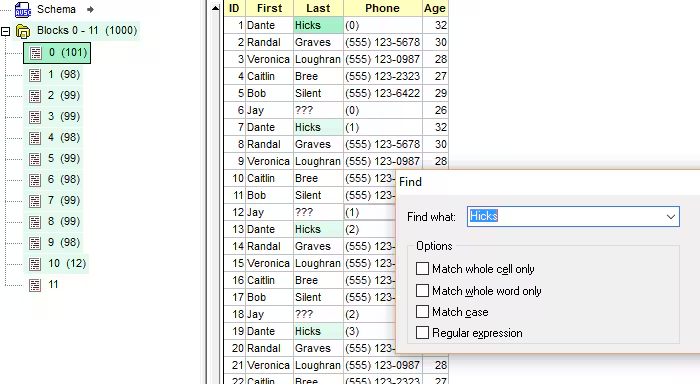

## Parquet File Format

- Parquet is a specialized column-based file format designed for efficient storage and querying of large datasets
- It's fast for read operations
  - Reading a specific column doesn't require scanning the entire file
  - Column-based storage enables faster query performance due to vectorized reading
- Similar data in columns allows for efficient compression algorithms
- Allows schema evolution
- Initially developed by Twitter and Cloudera
- Now an open-source project under Apache Software Foundation
- Especially useful for data with a large number of columns

In [ ]:
## Anatomy of a Parquet File

- File Metadata: The starting point of the file, contains metadata like schema
- Column Chunks: Data is organized into sets of columns, each set called a chunk
- Row Groups: Each chunk can be split further into row groups to optimize reads


### Data Context
* 
Suppose you have a simplified dataset with the following columns:

  * Transaction_ID (e.g., 001, 002, ...)
  * Time (e.g., 10:01, 10:02, ...)
  * Number_of_Items_Purchased (e.g., 4, 2, ...)
  * Transaction_Total (e.g., 20.50, 10.00, ...)



## Data Partitioning in Parquet

- Basic Partitioning: Data can be divided into sub-folders based on a column value
- Nested Partitions: You can create partitions within partitions based on multiple columns
- Example Folder Structure, where we're split on the similar values of the MONTH or department

```
/root_directory  
    /HOUR=10
        CITY=HONOLULU
           data..
        CITY=MONTREAL
            data..
        
    /HOUR=11
        CITY=HONOLULU
           data..
        CITY=MONTREAL
            data..

    ...      
```



### File Header

* The File Header provides the Parquet version and schema information. 
  * It essentially lays out what kinds of columns (and their data types) the reader should expect. 
```
message transaction_schema {
  required int64 Transaction_ID;
  required binary Time (UTF8);
  required int32 Number_of_Items_Purchased;
  required double Transaction_Total;
  required binary City (UTF8);
}
```

### Column Chunks
* Column Chunks are contiguous blocks of data from a single column. 
* In our example, one Column Chunk might store a million Transaction_ID values
* another might store a million Time values, and so on.
```
Column Chunk for Transaction_ID: [T001, T002, ... (up to 1,000,000  entries)]
Column Chunk for Time: [10:01, 10:02, ... (up to 1,000,000  entries)]
Column Chunk for Number_of_Items_Purchased: [1, 2, ... (up to 1,000,000  entries)]
Column Chunk for Transaction_Total: [20.50, 10.00, ... (up to 1,000,000  entries)]
Column Chunk for City: [Honolulu, Montreal, ... (up to 1,000,000  entries)]
```

### Row Groups

* Row groups bundle together a subset of Column Chunks to make reads more efficient. 
  * 
  
    * i.e., column for a subset of rows. 

* ex. Row Group 1 might contain the first million records for each column
```
Row Group 1:
  - Column Chunk 1 for Time: [10:01, 10:02, ... (up to 1,000,000 entries)]
  - Column Chunk 1 for Number_of_Items_Purchased: [1, 2, ... (up to 1,000,000 entries)]
  - Column Chunk 1 for Transaction_Total: [20.50, 10.00, ... (up to 1,000,000 entries)]
  - Column Chunk 1 for City: [Honoluly, montreal, ... (up to 1,000,000 entries)]
```

## Analytics and Reading Data in Parquet

- If you've partitioned your data well, you generally you will only need to read the partitions that are relevant to your query
  - For instance, if you're interested in transactions that occurred in the 10:00 AM, you would only read the files under the /Hour=10 directory
- High-level tools that can manage partitions and fetch only relevant data when using Parquet include:
  - Apache Spark (covered later in class)
  - Presto (open-source distributed SQL)
  - Amazon Athena (based on Presto and optimized for Amazon S3)
  - Many other open source or commercial high-level tools and query engines


## PARQUET Pros and Cons

* **Pros**:
  - Highly compressible since data is stored column-wise (compression rates up to 75%)
    - Can use different compression algorithms with different datatypes
  - Seamless splittability across columns
  - Optimized for reading data and ideal for read-intensive tasks
    - Can use parallelization to read different columns

* **Cons**:
  - Very slow at writing data and not good with write-intensive applications
  - Does not support updates on the data as Parquet files are immutable




## Conclusion

When choosing a file format for your big data project, consider the following factors:
- The nature of your data (row-based vs column-based)
- Your primary use case (read-heavy vs write-heavy)
- The need for schema evolution
- Compression requirements
- Splittability for distributed processing

Each format has its strengths and weaknesses, and the best choice depends on your specific needs and constraints. Always benchmark different formats with your actual data and use cases to determine the most suitable option for your project.

In [55]:
import random
random.choices("ACGT", k=6)

['A', 'A', 'T', 'G', 'C', 'G']

In [56]:
import string 

print(string.printable)
print(string.digits)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

0123456789


In [57]:
import zlib 
import string

# let's randomly generate two string of 1000, an ASCII and an INT

random_ASCII = random.choices(string.printable, k=10_000)
random_numbers = random.choices(string.digits, k=10_000)
print(len(zlib.compress( str.encode("".join(random_ASCII)))))
print(len(zlib.compress( str.encode("".join(random_numbers)))))

8421
5088


In [28]:
import numpy
ratios = []
for i in range(10):
    random_ASCII = random.choices(string.printable, k=10_000)
    random_numbers = random.choices(string.digits, k=10_000)
    len_ascii = len(zlib.compress( str.encode("".join(random_ASCII)))) 
    len_numbers = len(zlib.compress( str.encode("".join(random_numbers))))
    ratios.append(len_ascii/len_numbers)
    
numpy.mean(ratios)

1.6547445239154617

In [19]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [29]:
ratios = []
for i in range(10):
    random_ASCII = random.choices(string.printable, k=10_000)
    random_uppercase = random.choices(string.ascii_uppercase, k=10_000)
    len_ascii = len(zlib.compress( str.encode("".join(random_ASCII)))) 
    len_uppercase = len(zlib.compress( str.encode("".join(random_uppercase))))
    ratios.append(len_ascii/len_uppercase)    
numpy.mean(ratios)

1.3462144408226877

In [ ]:
### Metadata
* Contains information that helps in reading and interpreting the data effectively. 

* This can include:
  * Summary statistics (e.g., min and max values for each column)
  * Compression type used for each column
  * Optional custom key-value pairs, ex. `{ "regions": "north-america", "requested-by": "john"}`
  * Schema definitions.
  

### Data Partitioning in Parquet

* Basic Partitioning: Data can be divided into sub-folders based on a column value.
* Nested Partitions: You can create partitions within partitions based on multiple columns.
* Example Folder Structure, where we're  split on the similar values of the MONTH  or department

```python
/root_directory  
    /HOUR=10
        CITY=HONOLULU
           data..
        CITY=MONTREAL
            data..
        
    /HOUR=11
        CITY=HONOLULU
           data..
        CITY=MONTREAL
            data..

    ...      
```

### Memory Mapping for Working with Large Files

* Memory Mapping is a technique to map either a segment or an entire file from disk into virtual memory.
  * Links a file on disk directly to a section of virtual memory.
* Only the necessary portions of a file are loaded into RAM, as and when needed making efficient use of memory.
* Allows programs to work with files larger than available physical RAM.


### Reading a File From Disk

1. An application initiates a read() system call, moving the request from user space to kernel space.
2. The kernel instructs the hardware to fetch the needed data from the disk.
3. Data is loaded into a kernel buffer, often via Direct Memory Access (DMA) to bypass CPU involvement.
4. Kernel copies data to a user-space buffer specified in the read() call.
  * Kernel Buffers: Optimized for system tasks, reside in privileged memory.
  * User-Space Buffers: For application tasks, accessible by the application.
5. Application proceeds with its logic in user space, using the data in its buffer.
6. A write() system call copies data from user space to a kernel socket buffer.
7. Kernel writes this data to the hardware.
8. Hardware confirms the completion of the write operation to the kernel.
9. write() system call returns, completing the write operation.

### READ FILE

![](https://www.dropbox.com/s/0uaxprebndgw1sn/read_file.png?dl=1)

### Memory Mapping a File From Disk

* `mmap()`: A System Call for Memory Mapping
  * This system call requests the mapping of a file into the application's address space.
  * The request transitions from user space to kernel space to establish the mapping.
* The kernel communicates with the hardware to map the relevant file data into a memory section (RAM).
  * This is typically done "lazily," meaning data may not be loaded until accessed.
* Once the mapping is set up, the application can directly access and modify the data as if it were in its own memory space.
* If data in the mapped memory region is altered, the kernel will eventually flush these changes back to the hardware.
  * The operating system optimizes the timing of this flush based on various factors like system load and other I/O operations.
* `munmap()`:  This system call is used to unmap a previously mapped memory section.
  * It signals the kernel to remove the mapping and release the resources.

### MMAP
![](https://www.dropbox.com/s/eezmaerp24s45s8/mmap.png?dl=1)

In [2]:
%%time
import pandas as pd
data = pd.read_parquet("~/Downloads/fhvhv_tripdata_2022-06.parquet")
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17780075 entries, 0 to 17780074
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [4]:
# %%time
# data.to_csv("~/Downloads/fhvhv_tripdata_2022-06.csv")

CPU times: user 1min 58s, sys: 3.6 s, total: 2min 2s
Wall time: 2min 3s


In [9]:
import psutil
import os

def print_mem():
    gig = psutil.Process(os.getpid()).memory_info().rss / 1024 ** 3
    print(f"{gig} gigabytes")
print_mem()

4.2209930419921875 gigabytes


In [13]:
%time df = pd.read_csv("~/Downloads/fhvhv_tripdata_2022-06.csv")

CPU times: user 25.2 s, sys: 3.33 s, total: 28.5 s
Wall time: 29.3 s


In [14]:
print_mem()

14.629287719726562 gigabytes


In [15]:
del df

In [29]:
print_mem()

6.766876220703125 gigabytes


In [4]:
import mmap
import os

In [31]:
%%time
file_handle = open("/Users/mahdi/Downloads/fhvhv_tripdata_2022-06.csv", 'r+b') 
mmap_file = mmap.mmap(file_handle.fileno(), 0)


CPU times: user 419 µs, sys: 723 µs, total: 1.14 ms
Wall time: 17.8 ms


In [32]:
print_mem()

6.766632080078125 gigabytes


In [33]:
line = mmap_file.readline()
print(f"Line 0:\t{line}")


Line 0:	b',hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag\n'


In [34]:
line = mmap_file.readline()
print(f"Line 1:\t{line}")


Line 1:	b'0,HV0003,B03404,B03404,2022-06-01 00:15:35,2022-06-01 00:17:20,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.5,480,7.68,0.0,0.23,0.68,2.75,0.0,1.0,9.36,N,N, ,N,N\n'


In [35]:
mmap_file.seek(0)
line = mmap_file.readline()
print(f"Line 0:\t{line}")

Line 0:	b',hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag\n'


In [37]:
mmap_file.seek?

In [36]:
mmap_file.seek(2)
line = mmap_file.readline()
print(f"Starting at 2:\t{line}")

Starting at 2:	b'vfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag\n'


In [38]:
mmap_file.seek(0)
mmap_file.find(b'\n')

353

In [41]:
mmap_file.seek(353+1)
line = mmap_file.readline()
print(f"{line}")


b'0,HV0003,B03404,B03404,2022-06-01 00:15:35,2022-06-01 00:17:20,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.5,480,7.68,0.0,0.23,0.68,2.75,0.0,1.0,9.36,N,N, ,N,N\n'


In [42]:
mmap_file.tell()

520

In [43]:
%%time
data = open("/Users/mahdi/Downloads/fhvhv_tripdata_2022-06.csv", 'r').read()
len(data)

CPU times: user 263 ms, sys: 726 ms, total: 989 ms
Wall time: 988 ms


2979703837

In [48]:
chr(mmap_file[0])

'o'

In [52]:
mmap_file[0:12]


b'location_key'

In [54]:
# almost equivalent to 
[x.to_bytes(1, 'big') for x in mmap_file[0:12]]


[b'l', b'o', b'c', b'a', b't', b'i', b'o', b'n', b'_', b'k', b'e', b'y']

In [56]:
# equivalent to 
b''.join([x.to_bytes(1, 'big') for x in mmap_file[0:12]])

b'location_key'

In [57]:
# almsot equivalent to 
"".join([chr(x) for x in mmap_file[0:12]])

'location_key'

In [7]:
%%time
file_handle = open("/Users/mahdi/Downloads/fhvhv_tripdata_2022-06.csv", 'r+b') 
total_lines = 0 
mmap_file = mmap.mmap(file_handle.fileno(), 0)
while mmap_file.readline():
    total_lines += 1
total_lines        

CPU times: user 1.74 s, sys: 366 ms, total: 2.11 s
Wall time: 2.11 s


17780076

In [77]:
!du -sch ~/Downloads/aggregated_100.csv

101G	/Users/mahdi/Downloads/aggregated_100.csv
101G	total


In [78]:
%%time
file_handle = open("/Users/mahdi/Downloads/aggregated_100.csv", 'r+b') 


CPU times: user 232 µs, sys: 986 µs, total: 1.22 ms
Wall time: 781 µs


In [5]:
%%time
total_lines = 0 
file_handle = open("/Users/mahdi/Downloads/fhvhv_tripdata_2022-06.csv",) 
while file_handle.readline():
    total_lines += 1
total_lines        

CPU times: user 2.46 s, sys: 380 ms, total: 2.84 s
Wall time: 2.85 s


17780076

In [8]:
# The following creates a csv file with randome fields with num_cols and 10M entrie

import csv
import random
import string

num_rows = 10000000  # 10 million rows
num_cols = 100  # 100 columns

# This will generate a random string of length n
def random_string(n=10):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=n))

# Open a new CSV file in write mode ('w')
with open('large_file.csv', 'w', newline='', buffering=10485760) as csvfile:  # 10 MB buffer
    csv_writer = csv.writer(csvfile)
    
    # Write the header
    csv_writer.writerow([f"Column_{i}" for i in range(num_cols)])

    # Write the rows
    for _ in range(num_rows):
        csv_writer.writerow([random_string() for _ in range(num_cols)])


In [18]:
%%time
file_handle = open("large_file.csv", 'r+b') 
total_lines = 0 
mmap_file = mmap.mmap(file_handle.fileno(), 0)
while mmap_file.readline():
    total_lines += 1
total_lines        

CPU times: user 1.88 s, sys: 4.32 s, total: 6.2 s
Wall time: 23.6 s


10000001

In [19]:
%%time
total_lines = 0 
file_handle = open("large_file.csv",) 
while file_handle.readline():
    total_lines += 1
total_lines        

CPU times: user 7.84 s, sys: 1.43 s, total: 9.27 s
Wall time: 9.36 s


10000001

In [30]:
%%time
with open("large_file.csv", 'r+b') as file_handle:
    total_lines = 0
    mmap_file = mmap.mmap(file_handle.fileno(), 0)
    chunk_size = 1 << 17  # 64 KiB
    while True:
        chunk = mmap_file.read(chunk_size)
        if not chunk:
            break
        total_lines += chunk.count(b'\n')


CPU times: user 4.29 s, sys: 1.53 s, total: 5.82 s
Wall time: 5.83 s
